# LA Crime data analysis

## Data Analysis
#### I further tried to understand the data by seeing info, describe, columns names, and which crimes had the most counts. 
#### Then I wanted to map them out by months and year. Then I graphed them out according to months, years, hours, etc. I also graphed out all of the counted crimes.

In [2]:
import pandas as pd
import numpy as np
import requests

%matplotlib inline
import matplotlib.pyplot as plt

import datetime as dt

import seaborn as sns


In [3]:
crime_data = pd.read_csv('Resources/Crime_Data_from_2010_to_2019.csv')
arrest_data = pd.read_csv('Resources/Arrest_Data_from_2010_to_Present.csv')
mo_codes = pd.read_csv('Resources/MO_Codes.csv')

In [4]:
#Seeing the info, there are 25 columns and 2,112,304 rows
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112305 entries, 0 to 2112304
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   DR_NO                      int64  
 2   Date_Reported              object 
 3   Date_occured               object 
 4   Time_occured               int64  
 5   Area_ID                    int64  
 6   Area_name                  object 
 7   Reporting_district_number  int64  
 8   Crime_code                 int64  
 9   Crime_code_description     object 
 10  MOC_codes                  object 
 11  Victim_age                 int64  
 12  Victim_sex                 object 
 13  Victim_descent             object 
 14  Premise_code               float64
 15  Premise_description        object 
 16  Weapon_used_code           float64
 17  Weapon_description         object 
 18  Status                     object 
 19  Status_description         object 
 20  Cr

In [5]:
# Describe count, mean, std, min, etc.
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2112305.0,1.056152e+06,6.097701e+05,0.0000,5.280760e+05,1.056152e+06,1.584228e+06,2.112304e+06
DR_NO,2112305.0,1.478730e+08,2.884866e+07,112.0000,1.214223e+08,1.508069e+08,1.715097e+08,9.102204e+08
Time_occured,2112305.0,1.360419e+03,6.470183e+02,1.0000,9.300000e+02,1.430000e+03,1.900000e+03,2.359000e+03
Area_ID,2112305.0,1.108802e+01,6.012176e+00,1.0000,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
Reporting_district_number,2112305.0,1.155190e+03,6.012333e+02,100.0000,6.430000e+02,1.189000e+03,1.668000e+03,2.199000e+03
Crime_code,2112305.0,5.070557e+02,2.104684e+02,110.0000,3.300000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Victim_age,2112305.0,3.178457e+01,2.063867e+01,-9.0000,2.000000e+01,3.200000e+01,4.600000e+01,1.180000e+02
Premise_code,2112252.0,3.109094e+02,2.111942e+02,101.0000,1.020000e+02,2.100000e+02,5.010000e+02,9.710000e+02
Weapon_used_code,710019.0,3.713494e+02,1.134948e+02,101.0000,4.000000e+02,4.000000e+02,4.000000e+02,5.160000e+02
Crime_code.1,2112295.0,5.068792e+02,2.103301e+02,110.0000,3.300000e+02,4.410000e+02,6.260000e+02,9.990000e+02


In [6]:
crime_data.head()

,Unnamed: 0,DR_NO,Date_Reported,Date_occured,Time_occured,Area_ID,Area_name,Reporting_district_number,Crime_code,Crime_code_description,...,Premise_description,Weapon_used_code,Weapon_description,Status,Status_description,Crime_code.1,Location,Cross_street,LAT,LNG
0,0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,900,VIOLATION OF COURT ORDER,...,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,900.0,300 E GAGE AV,NaN,33.9825,-118.2695
1,1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,STREET,NaN,NaN,IC,Invest Cont,740.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,...,ALLEY,NaN,NaN,IC,Invest Cont,946.0,1300 E 21ST ST,NaN,34.0224,-118.2524
3,3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,900,VIOLATION OF COURT ORDER,...,STREET,102.0,HAND GUN,IC,Invest Cont,900.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,122,"RAPE, ATTEMPTED",...,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,122.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [7]:
# Column names of crime data
crime_data.columns

Index(['Unnamed: 0', 'DR_NO', 'Date_Reported', 'Date_occured', 'Time_occured',
       'Area_ID', 'Area_name', 'Reporting_district_number', 'Crime_code',
       'Crime_code_description', 'MOC_codes', 'Victim_age', 'Victim_sex',
       'Victim_descent', 'Premise_code', 'Premise_description',
       'Weapon_used_code', 'Weapon_description', 'Status',
       'Status_description', 'Crime_code.1', 'Location', 'Cross_street', 'LAT',
       'LNG'],
      dtype='object')

In [8]:
#Crime code and Crime code description
crime = crime_data[['Crime_code', 'Crime_code_description']]

#Check for any null values (there are none) but if there were, use drop.na
crime.isnull().any()

Crime_code                False
Crime_code_description    False
dtype: bool

In [9]:
#Top 10 crimes
crime_top_result = crime['Crime_code_description'].value_counts()[:10]
crime_df = pd.DataFrame(crime_top_result)
crime_df

,Crime_code_description
BATTERY - SIMPLE ASSAULT,190540
BURGLARY FROM VEHICLE,162152
VEHICLE - STOLEN,159847
THEFT PLAIN - PETTY ($950 & UNDER),149797
BURGLARY,147608
THEFT OF IDENTITY,126739
INTIMATE PARTNER - SIMPLE ASSAULT,114526
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",109431
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",92705
VANDALISM - MISDEAMEANOR ($399 OR UNDER),90420


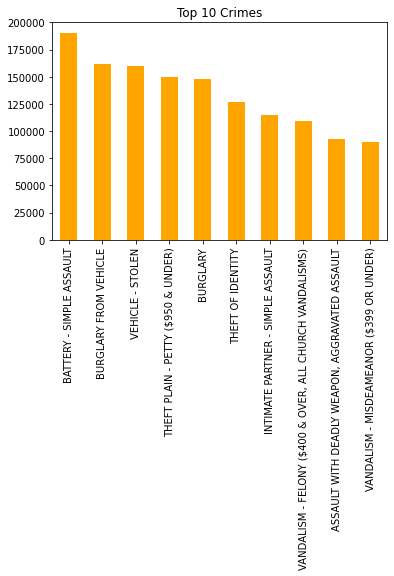

According to the graph, battery - simple assault has the highest crime rate followed by burglary from vehicle in Los Angeles from 2010 to 2019.


<Figure size 432x288 with 0 Axes>

In [13]:
#Plot the top 10 crimes

crime_df.plot.bar(legend=False, color='orange')
plt.title('Top 10 Crimes')
plt.show()
plt.savefig('../Group_4/Charts/top_10_crimes.png')
print(f'According to the graph, battery - simple assault has the highest crime rate followed by burglary from vehicle in Los Angeles from 2010 to 2019.')

In [14]:
#crime_data['year'] = pd.Series(crime_data['Date_Reported'].str[5:], index=crime_data.index)
#crime_year = crime_data['year'].value_counts(sort=False).sort_index()
#crime_year.plot(kind='line')
#plt.show()

In [15]:
#Trying to separate the data on Month, Day, Year, hour, and minute (so I tried to do this with date column first)

# Dataframe with one column of information of Date Reported 
crime_time = crime_data['Date_Reported']
crime_time_df = pd.DataFrame(crime_time)
crime_time_df.head()

,Date_Reported
0,02/20/2010 12:00:00 AM
1,09/13/2010 12:00:00 AM
2,08/09/2010 12:00:00 AM
3,01/05/2010 12:00:00 AM
4,01/03/2010 12:00:00 AM


In [16]:
# Use datetime to convert the data so it can be extracted by .dt
crime_time_df['Date_Reported'] = pd.to_datetime(crime_time_df['Date_Reported'])
crime_time_df.Date_Reported

0         2010-02-20
1         2010-09-13
2         2010-08-09
3         2010-01-05
4         2010-01-03
             ...    
2112300   2019-03-28
2112301   2019-08-15
2112302   2019-01-06
2112303   2019-10-17
2112304   2019-02-01
Name: Date_Reported, Length: 2112305, dtype: datetime64[ns]

In [17]:
crime_time_df['new_formatted_date'] = crime_time_df.Date_Reported.dt.strftime('%d/%m/%y %H:%M')
crime_time_df.new_formatted_date

0          20/02/10 00:00
1          13/09/10 00:00
2          09/08/10 00:00
3          05/01/10 00:00
4          03/01/10 00:00
                ...      
2112300    28/03/19 00:00
2112301    15/08/19 00:00
2112302    06/01/19 00:00
2112303    17/10/19 00:00
2112304    01/02/19 00:00
Name: new_formatted_date, Length: 2112305, dtype: object

In [18]:
# Extract Month, Day, year, hour, and minute
# Assign all these date component to new column

crime_time_df['Year'] = crime_time_df['Date_Reported'].dt.year
crime_time_df['Month'] = crime_time_df['Date_Reported'].dt.month
crime_time_df['Day'] = crime_time_df['Date_Reported'].dt.day
crime_time_df['Hour'] = crime_time_df['Date_Reported'].dt.hour
crime_time_df['Minute'] = crime_time_df['Date_Reported'].dt.minute
crime_time_df.head()

,Date_Reported,new_formatted_date,Year,Month,Day,Hour,Minute
0,2010-02-20,20/02/10 00:00,2010,2,20,0,0
1,2010-09-13,13/09/10 00:00,2010,9,13,0,0
2,2010-08-09,09/08/10 00:00,2010,8,9,0,0
3,2010-01-05,05/01/10 00:00,2010,1,5,0,0
4,2010-01-03,03/01/10 00:00,2010,1,3,0,0


In [19]:
crime_time_df.tail()

,Date_Reported,new_formatted_date,Year,Month,Day,Hour,Minute
2112300,2019-03-28,28/03/19 00:00,2019,3,28,0,0
2112301,2019-08-15,15/08/19 00:00,2019,8,15,0,0
2112302,2019-01-06,06/01/19 00:00,2019,1,6,0,0
2112303,2019-10-17,17/10/19 00:00,2019,10,17,0,0
2112304,2019-02-01,01/02/19 00:00,2019,2,1,0,0


In [20]:
# My code added to the main crime data
crime_data['Date_Reported'] = pd.to_datetime(crime_data['Date_Reported'])
crime_data['Year'] = crime_data['Date_Reported'].dt.year
crime_data['Month'] = crime_data['Date_Reported'].dt.month
crime_data['Day'] = crime_data['Date_Reported'].dt.day
crime_data['Hour'] = crime_data['Date_Reported'].dt.hour
crime_data['Minute'] = crime_data['Date_Reported'].dt.minute
crime_data.head()

,Unnamed: 0,DR_NO,Date_Reported,Date_occured,Time_occured,Area_ID,Area_name,Reporting_district_number,Crime_code,Crime_code_description,...,Crime_code.1,Location,Cross_street,LAT,LNG,Year,Month,Day,Hour,Minute
0,0,1307355,2010-02-20,02/20/2010 12:00:00 AM,1350,13,Newton,1385,900,VIOLATION OF COURT ORDER,...,900.0,300 E GAGE AV,NaN,33.9825,-118.2695,2010,2,20,0,0
1,1,11401303,2010-09-13,09/12/2010 12:00:00 AM,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010,9,13,0,0
2,2,70309629,2010-08-09,08/09/2010 12:00:00 AM,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,...,946.0,1300 E 21ST ST,NaN,34.0224,-118.2524,2010,8,9,0,0
3,3,90631215,2010-01-05,01/05/2010 12:00:00 AM,150,6,Hollywood,646,900,VIOLATION OF COURT ORDER,...,900.0,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010,1,5,0,0
4,4,100100501,2010-01-03,01/02/2010 12:00:00 AM,2100,1,Central,176,122,"RAPE, ATTEMPTED",...,122.0,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010,1,3,0,0


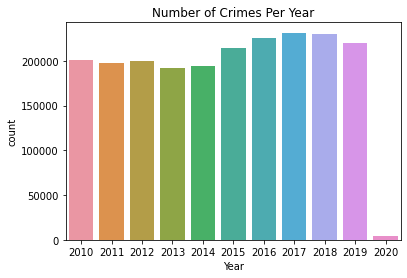

In [21]:
# Crimes by year
sns.countplot(data=crime_data, x='Year').set_title('Number of Crimes Per Year');
plt.savefig('../Group_4/Charts/number_of_crimes_per_year.png')

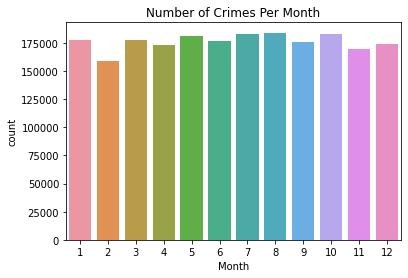

In [22]:
# Crimes by month
a = sns.countplot(data=crime_data, x='Month').set_title('Number of Crimes Per Month');
plt.savefig('../Group_4/Charts/number_of_crimes_per_month.png')

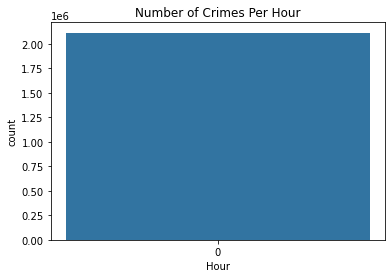

In [23]:
# Crimes by hours (this section is still in progress...)
sns.countplot(data=crime_data, x='Hour').set_title('Number of Crimes Per Hour');

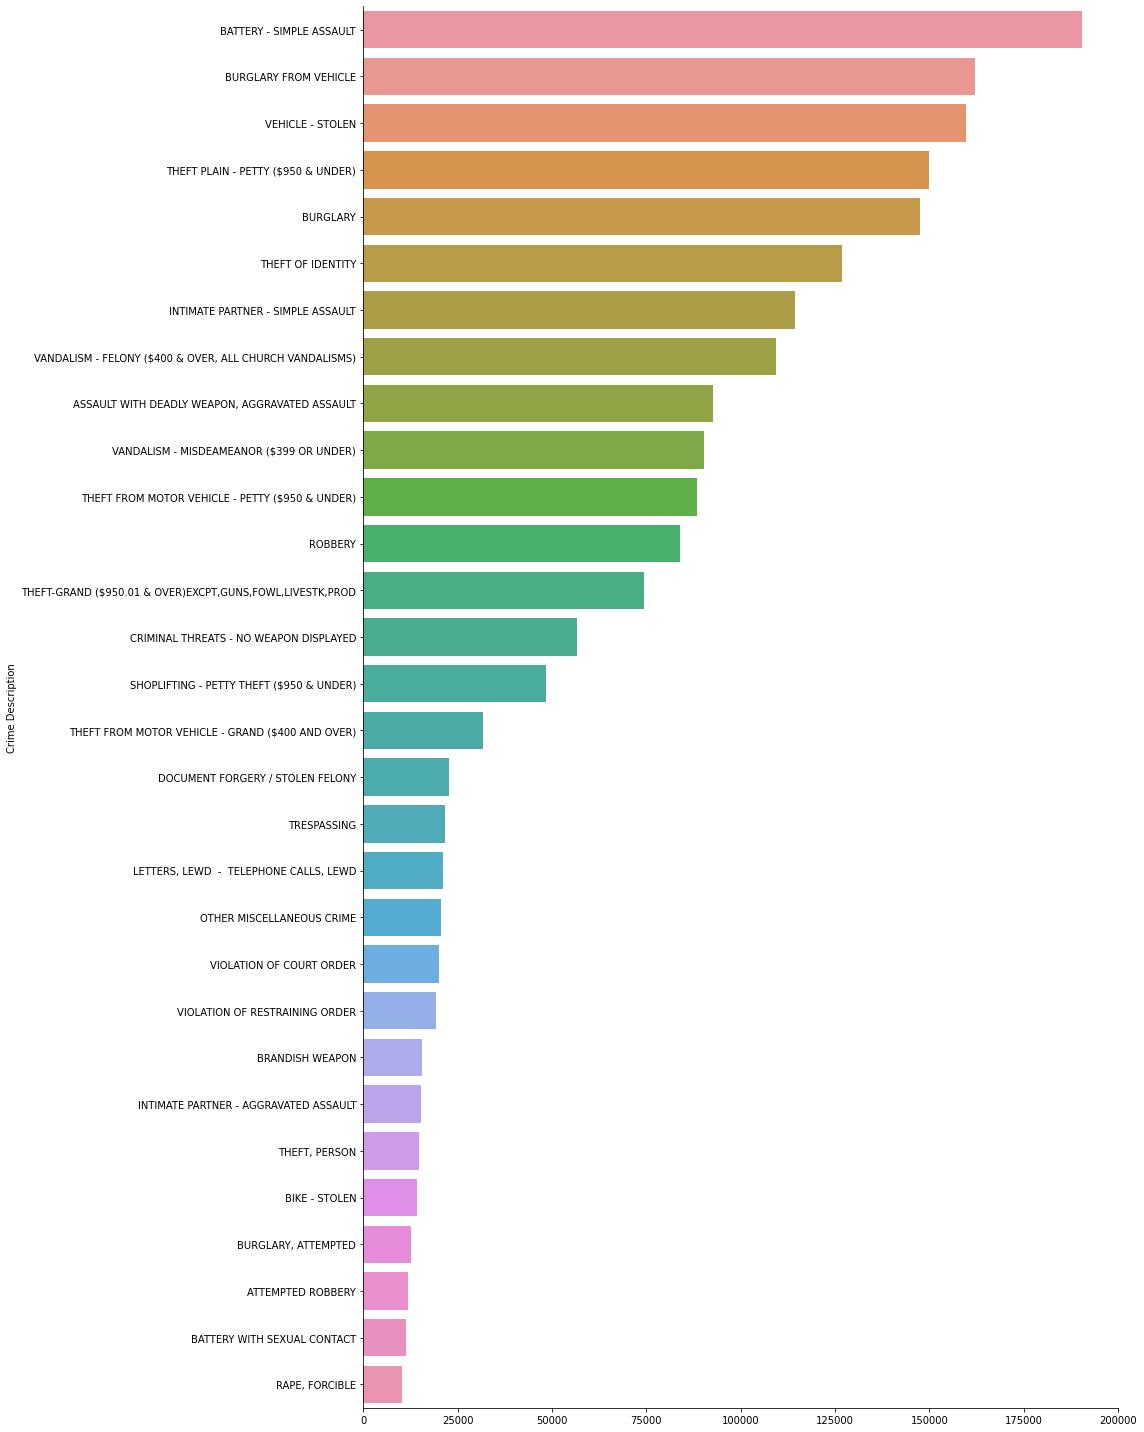

In [24]:
g = sns.catplot(y='Crime_code_description',
            kind='count',
            height=20, 
            aspect=0.8,
            order=crime_data.Crime_code_description.value_counts().head(30).index,
            data=crime_data)
g.set_titles('Counts of Crime Based On Crime Description')
g.set_axis_labels('','Crime Description')
plt.savefig('../Group_4/Charts/ntop_crimes_based_description.png')

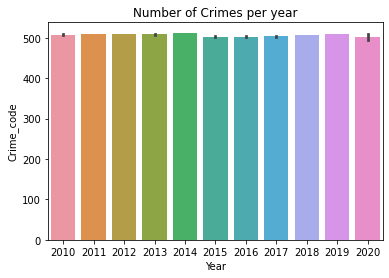

In [26]:
# groupby_crimecode = crime_data.groupby(["Crime_code", "Month"])
# groupby_crimecode

# x = crime_data['Month'].astype('float')
# y = crime_data['Crime_code'].astype('float')

# plt.hist(x,y)
#sns.countplot(x='Month', y ='Crime_code', data=crime_data).set_title('Number of Crimes Per Month');
sns.barplot(x = 'Year', y = 'Crime_code', data = crime_data).set_title('Number of Crimes per year');
plt.savefig('../Group_4/Charts/number_ofcrime_code_per_year.png')

In [27]:
arrest_time = arrest_data['Arrest_date']
arrest_time_df = pd.DataFrame(arrest_time)
#arrest_time_df.head()

arrest_time_df['Arrest_date'] = pd.to_datetime(arrest_time_df['Arrest_date'])
#arrest_time_df.head()
arrest_time_df['Year'] = arrest_time_df['Arrest_date'].dt.year
arrest_time_df['Month'] = arrest_time_df['Arrest_date'].dt.month
arrest_time_df['Day'] = arrest_time_df['Arrest_date'].dt.day

arrest_time_df.head()

,Arrest_date,Year,Month,Day
0,2019-11-21,2019,11,21
1,2019-10-03,2019,10,3
2,2019-11-13,2019,11,13
3,2015-03-11,2015,3,11
4,2015-03-26,2015,3,26


In [28]:
arrest_data['Year'] = arrest_time_df['Year']
arrest_data['Month'] = arrest_time_df['Month']
arrest_data['Day'] = arrest_time_df['Day']
arrest_data.head()

,Unnamed: 0,Report_ID,Arrest_date,Time,Area_ID,Area_name,Reporting_district_number,Age,Sex_code,Descent_code,...,Arrest_type_code,Charge,Charge_description,Address,Cross_street,LAT,LNG,Year,Month,Day
0,0,5805106,11/21/2019,2100.0,3,Southwest,328,25,M,B,...,F,459PC,BURGLARY,32ND,HOOVER,34.0255,-118.2839,2019,11,21
1,1,190127182,10/03/2019,1000.0,1,Central,119,30,M,B,...,M,640(D)(3)PC,URINTATIN/DEFECATING ON TRAIN OR SYSTEM,800 N ALAMEDA ST,NaN,34.0563,-118.2374,2019,10,3
2,2,191119468,11/13/2019,1500.0,11,Northeast,1102,39,F,O,...,M,459.2PC,NaN,2900 LOS FELIZ BL,NaN,34.1367,-118.2713,2019,11,13
3,3,4265695,03/11/2015,1315.0,21,Topanga,2118,34,F,B,...,F,211PC,ROBBERY,ROSCOE BL,WINNETKA AV,34.2202,-118.5710,2015,3,11
4,4,4280871,03/26/2015,1200.0,21,Topanga,2172,17,M,H,...,F,211PC,ROBBERY,5400 VALLEY CIRCLE DR,NaN,34.1684,-118.6426,2015,3,26


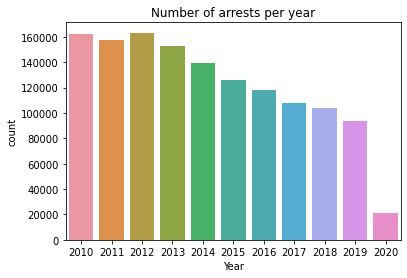

In [29]:
sns.countplot(data = arrest_data, x = "Year").set_title("Number of arrests per year")
plt.savefig('../Group_4/Charts/number_of_arrests_per_year.png')

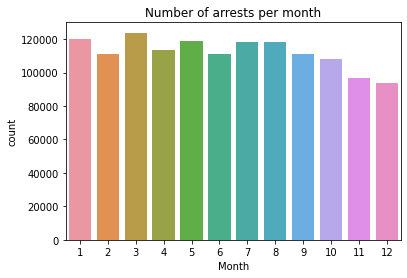

In [30]:
sns.countplot(data = arrest_data, x = "Month").set_title("Number of arrests per month")
plt.savefig('../Group_4/Charts/number_of_arrests_per_month.png')

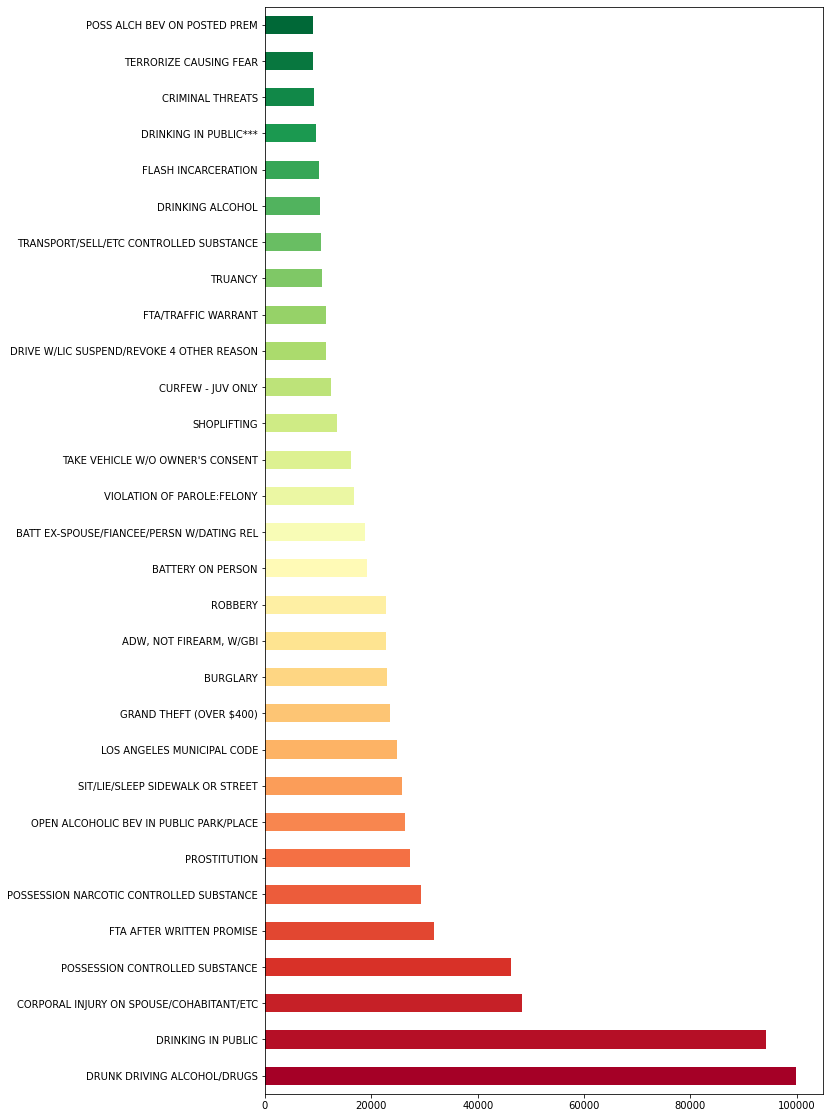

In [31]:
# g1 = sns.catplot(y='Charge_description',
#             kind='count',height = 20, aspect = 0.8,
#             order=arrest_data.Charge_description.value_counts().index,
#             data=arrest_data)
# #g1.fig.tight_layout()
# g1.set_titles('Number of Arrests per type')
# g1.set_axis_labels('','Charge_Description')
import matplotlib.cm as cm

colors = cm.RdYlGn(np.linspace(0,1,len(arrest_data['Charge_description'].value_counts().head(30))))
arrest_data['Charge_description'].value_counts().head(30).plot(kind='barh', figsize = (10,20),color = colors)
plt.savefig('../Group_4/Charts/toparrests_based_on_crime.png')

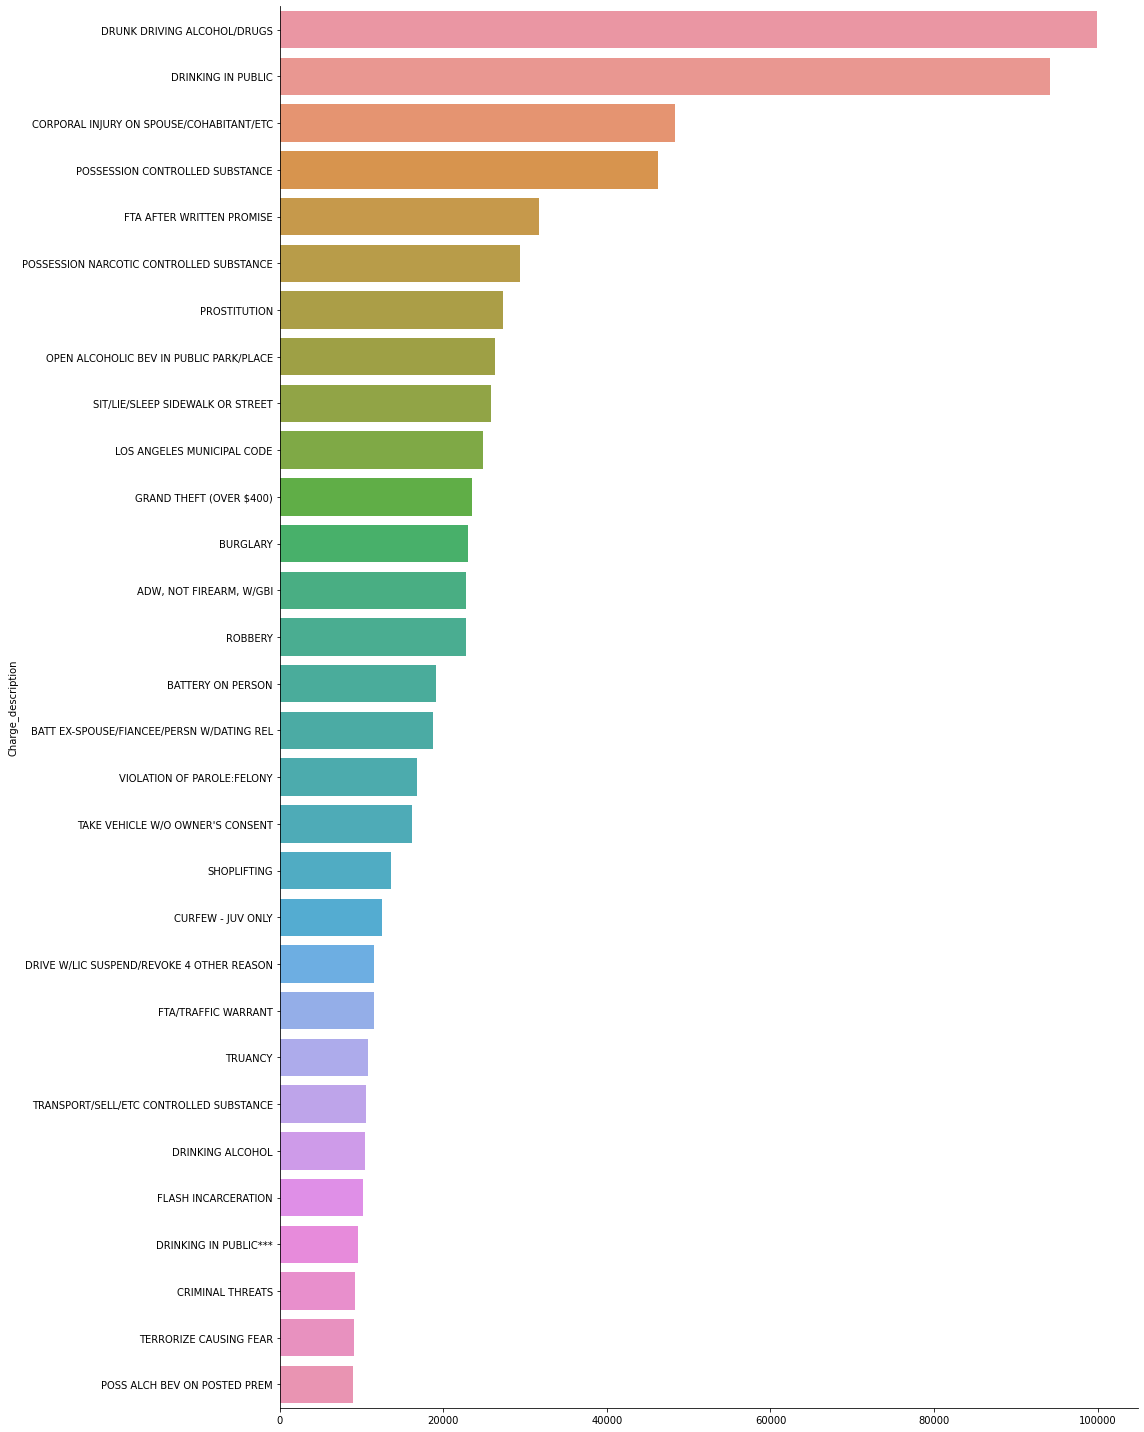

In [32]:
# Arrest data for top 30 arrest
g = sns.catplot(y='Charge_description',
            kind='count',
            height=20, 
            aspect=0.8,
            order=arrest_data.Charge_description.value_counts().head(30).index,
            data=arrest_data)
g.set_titles('Counts of Crime Based On Charge_description')
g.set_axis_labels('','Charge_description')
plt.savefig('../Group_4/Charts/top_arrests_based_on_crime_1.png')